# Recruitment task for OLX internship at metadata team
---

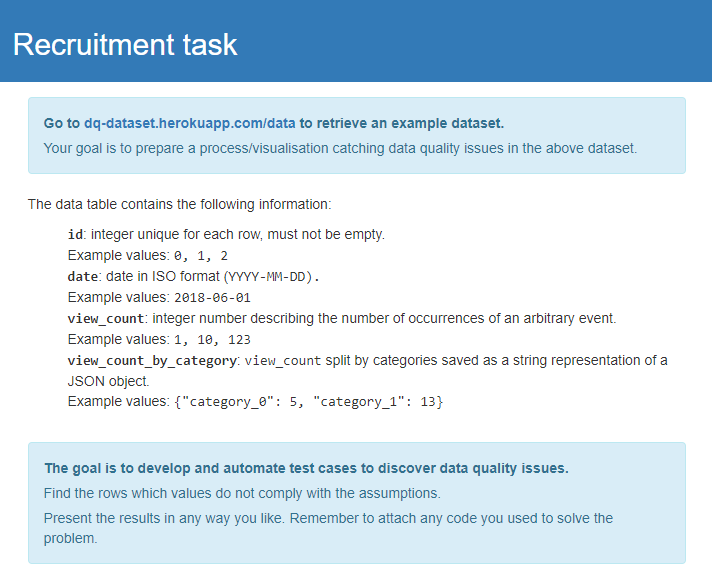

In [1]:
from IPython.display import Image
Image('https://image.ibb.co/fm4QvT/image.png', width=600, height=600)

### Importing all of the dependencies used throughout the project as well as environment variables
---

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import json
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'
sns.set(style="white")
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

### Reading the data from json file, available under the [link](http://dq-dataset.herokuapp.com/data)
---

In [3]:
data = pd.read_json("http://dq-dataset.herokuapp.com/data")

### Previewing the data
---

In [4]:
print(data.columns)

Index(['date', 'id', 'view_count', 'view_count_by_category'], dtype='object')


In [5]:
print(data.dtypes)

date                      object 
id                        float64
view_count                int64  
view_count_by_category    object 
dtype: object


In [6]:
print(data.shape)

(100, 4)


In [7]:
print(data.describe())

              id  view_count
count  99.000000  100.000000
mean   50.414141  249.190000
std    29.230265  90.451359 
min    0.000000  -354.000000
25%    25.500000  213.750000
50%    51.000000  244.500000
75%    75.500000  307.500000
max    99.000000  409.000000


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
date                      100 non-null object
id                        99 non-null float64
view_count                100 non-null int64
view_count_by_category    100 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB
None


### At this point indexes only complicate some operations; they'll be readded in the further part
---

In [9]:
data.drop('id', axis=1, inplace=True)

### As we can observe in a cell below, some of the dates use different formats; therefore, we need to handle them accordingly
---

In [10]:
data.date.values

array(['2017-12-22', '2011-06-22', '2009-06-25', '2007-09-14',
       '2012-12-15', '2001-06-08', '2001-02-21', '2015-02-06',
       '2000-10-27', '2009-04-01', '2000-05-31', '2001-08-26',
       '2010-08-14', '2015-11-11', '2004-10-26', '2002-02-14',
       '2000-09-02', '2005-07-08', '2010-04-29', '2008-11-27',
       '2015-06-14', '2003-11-02', '2006-12-26', '2002-01-02',
       '2016-09-14', '2013-01-23', '2013-11-23', '2003-02-16',
       '2013-09-21', '2014-10-12', '2001-09-03', '2013-09-22',
       '2008-03-07', '2004-11-26', '2017-11-28', '2012-09-25',
       '2016-10-26', '2008-04-02', '2001-07-21', '2003-07-16',
       '2002-09-19', '2001-06-16', '2011-08-07', '2008-07-19',
       '2012-12-24', '2016-09-04', '2006-05-15', '2001-09-25',
       '2016-10-19', '2004-10-06', '2004-10-01', '2006-11-11',
       '2003-04-19', '2013-04-25', '2010-10-09', '2017-08-09',
       '2012-02-05', '24-July-10', '2012-12-26', '2004-07-17',
       '2008-01-18', '2010-01-29', '2011-04-25', '2010-

### Additionaly - there's a date '9999' - it'll be dropped
---

In [11]:
sorted(data.date.tolist())[-1], sorted(data.date.tolist())[-1][0:4]

('9999-01-01', '9999')

In [12]:
temp = []
for x in data.date:
    if x[2] == '-' and x[3] >= 'A' and x[3] <= 'Z':
        print('date bofore: ' + x)
        date = datetime.strptime(x, "%d-%B-%y").strftime("%Y-%m-%d")
        temp.append(date)
        print('data after: ' + date + '\n')
    else:
        temp.append(x)

date bofore: 24-July-10
data after: 2010-07-24



In [13]:
temp = pd.DataFrame(temp)
data.drop('date', axis=1, inplace=True)
data = pd.concat([temp, data], axis=1)
data.rename(columns={0: 'date'}, inplace=True)

### Previewing the dataset after manipulating it in previous steps
---

In [14]:
data.head(2)

,date,view_count,view_count_by_category
0,2017-12-22,165,"{""category_0"": 76, ""category_1"": 21, ""category_2"": 40, ""category_3"": 16, ""category_4"": 12}"
1,2011-06-22,318,"{""category_0"": 28, ""category_1"": 56, ""category_2"": 95, ""category_3"": 76, ""category_4"": 63}"


### Now, that all the dates have been formatted back into desired ISO format (YYYY-MM-DD), there comes time to split dictionary-like strings from *view_count_by_category* column into according columns
---

In [15]:
data.view_count_by_category[0]

'{"category_0": 76, "category_1": 21, "category_2": 40, "category_3": 16, "category_4": 12}'

In [16]:
cols_to_split = data.view_count_by_category

In [17]:
col0 = []
col1 = []
col2 = []
col3 = []
col4 = []

for x in cols_to_split:
    x = x.replace("'", "\"")
    x = x.replace("  ", ", ")
    if(not x.endswith('}')):
        x += "}"
    wolaj_dzejsona = json.loads(x)
    col0.append(wolaj_dzejsona['category_0'])
    col1.append(wolaj_dzejsona['category_1'])
    col2.append(wolaj_dzejsona['category_2'])
    col3.append(wolaj_dzejsona['category_3'])
    col4.append(wolaj_dzejsona['category_4'])

### Concatenating two panda's DataFrames together
---

In [18]:
view_count_by_category = pd.DataFrame([col0, col1, col2, col3, col4]).T
view_count_by_category.columns = ['category_0_count', 'category_1_count', 'category_2_count', 'category_3_count', 'category_4_count']
data = pd.concat([data, view_count_by_category], axis=1)

### Some of the values from *view_count* column differ from the values obtained from the *view_count_by_category* column; I anticipated the sum of newly created columns are the correct ones
---

In [19]:
data['suma'] = data['category_0_count'] + data['category_1_count'] + data['category_2_count'] + data['category_3_count'] + data['category_4_count']

In [20]:
compare = np.where(data.suma != data.view_count)
print(compare[-1])

[25 34 49 62 89]


### Comparing and swapping the sums (the wrong one and the correct one) in the for-loop
---

In [21]:
for i in compare[-1]:
    print('element: ', i)
    print('pre: ', data.view_count[i])
    data.view_count[i] = data.suma[i]
    print('post: ', data.view_count[i])

element:  25
pre:  324
post:  316
element:  34
pre:  289
post:  287
element:  49
pre:  216
post:  210
element:  62
pre:  -354
post:  354
element:  89
pre:  140
post:  136


### Getting rid of *view_count_by_category* and *suma* columns, since they're not useful anymore
---

In [22]:
data.drop(['view_count_by_category', 'suma'], axis=1, inplace=True)

### Previewing the data after all the operations applied so far
---

In [23]:
data.head(2)

,date,view_count,category_0_count,category_1_count,category_2_count,category_3_count,category_4_count
0,2017-12-22,165,76,21,40,16,12
1,2011-06-22,318,28,56,95,76,63


### Getting rid of the row, containing '9999' date, mentioned before
---

In [24]:
sorted(data.date.tolist())[-1], sorted(data.date.tolist())[-1][0:4]

('9999-01-01', '9999')

In [25]:
deleted = []

for i, x in enumerate(data.date):
    if int(x[:4]) >= 9000:
        deleted.append(i)
        data.drop(data.index[i], inplace=True)

In [26]:
sorted(data.date.tolist())[-1], sorted(data.date.tolist())[-1][0:4]

('2017-12-22', '2017')

### Splitting dates into groups, so that categories can be visualized according to the dates
---

In [27]:
data_copy = data.copy()
list = []

for i, x in enumerate(data_copy.date):
    if i in deleted:
        list.append("")
        continue
    if int(x[:4]) < 2006:
        list.append('dates_2000-2005')
    elif int(x[:4]) < 2012 and int(x[:4]) > 2005:
        list.append('dates_2006-2011')
    else:
        list.append('dates_2012-2018')

list = pd.Series(list)
data_copy = pd.concat([data_copy, list], axis=1)
data_copy.dropna(inplace=True)
data_copy = data_copy.rename(columns={0: 'period'})

### As you can see below, convertion worked finely
---

In [28]:
for i, x in enumerate(data_copy.period):
    if i in deleted:
        continue
    print(i, '\t', data_copy.date[i], '\t--->\t', x)
    if i == 4:
        break

0 	 2017-12-22 	--->	 dates_2012-2018
1 	 2011-06-22 	--->	 dates_2006-2011
2 	 2009-06-25 	--->	 dates_2006-2011
3 	 2007-09-14 	--->	 dates_2006-2011
4 	 2012-12-15 	--->	 dates_2012-2018


### Plotting the data, creating very informative violin plots
---

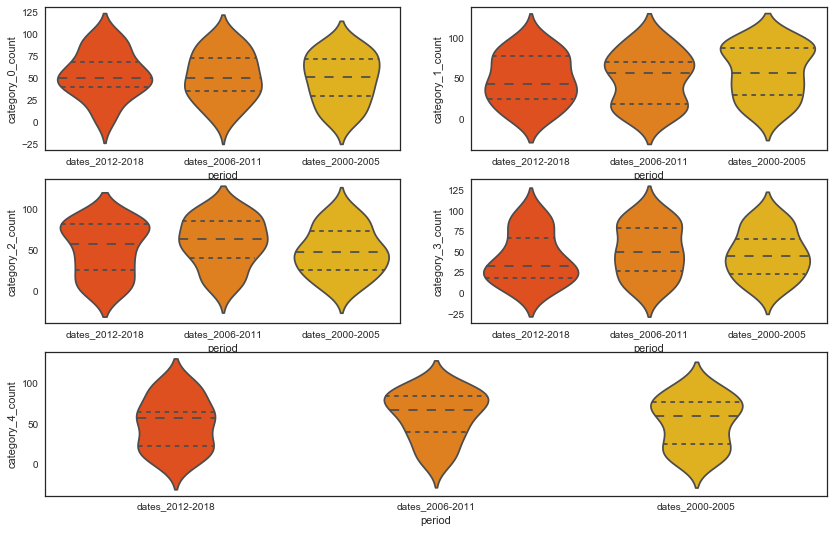

In [29]:
fig = plt.figure(figsize=(14,9))

ax1 = fig.add_subplot(321)
ax1 = sns.violinplot(x='period', y='category_0_count', data=data_copy, palette='autumn', inner='quartile')

ax2 = fig.add_subplot(322)
ax2 = sns.violinplot(x='period', y='category_1_count', data=data_copy, palette='autumn', inner='quartile')

ax3 = fig.add_subplot(323)
ax3 = sns.violinplot(x='period', y='category_2_count', data=data_copy, palette='autumn', inner='quartile')

ax4 = fig.add_subplot(324)
ax4 = sns.violinplot(x='period', y='category_3_count', data=data_copy, palette='autumn', inner='quartile')

ax5 = fig.add_subplot(313)
ax5 = sns.violinplot(x='period', y='category_4_count', data=data_copy, palette='autumn', inner='quartile', width=0.4)
plt.show()

### Preparing the correlation matrix; range - [-1; 1]; the lower the value, the less correlated the corresponding values are; analogical rules apply to positive values
---

In [30]:
corr = data.corr()
corr.view_count.drop('view_count', axis=0, inplace=True)
corr.category_0_count.drop('category_0_count', axis=0, inplace=True)
corr.category_1_count.drop('category_1_count', axis=0, inplace=True)
corr.category_2_count.drop('category_2_count', axis=0, inplace=True)
corr.category_3_count.drop('category_3_count', axis=0, inplace=True)
corr.category_4_count.drop('category_4_count', axis=0, inplace=True)

### Visualizing correlations between different features of the dataset, using heatmap
---

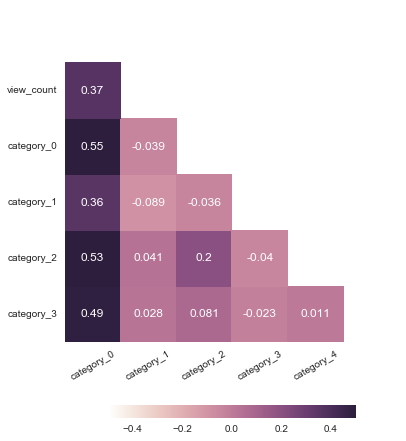

In [31]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(6, 9))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-.45, vmax=.5,
            square=True, annot=True, cbar_kws={"shrink": 0.74, "orientation": "horizontal", "pad": 0.13})
labels = ['category_0', 'category_1', 'category_2', 'category_3', 'category_4']
rev_labels = ['category_3', 'category_2', 'category_1', 'category_0', 'view_count']
g.set_xticklabels(labels=labels, rotation=30, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'top'})
g.set_yticklabels(labels=rev_labels , rotation=0, fontdict={'horizontalalignment': 'right', 'verticalalignment': 'center'})
plt.show()

---

## Credits
---
Albert Millert: [devmood](https://github.com/devmood)

#### MIT Licence